# FordGoBike San Francisco: User Group Analysis To Identify Growth Potential.
## by Stefan Cornelißen

## Investigation Overview

With this presentation I want to describe how user groups of FordGoBike in San Francisco are using the service. The exploration aims to outline which groups have used the service to what degree and where is potential for growth. The grouping is defined by the user type (customer or subscriber), gender and age. The analysis is based on the amount and duration of past rides.

## Dataset Overview

The dataset originates from FordGoBike itself and contains data of around 2.57 million rides at the moment of analysis. This amount covers the period of end June 2017 till end of January 2019. The dataset includes station names, the user type (subscriber or casual user), gender, user’s year of birth, trip duration, start and end time-stamps, start and end stations coordinates/names, as well as bikes and stations IDs. Each row represents a single ride. This set of attributes allows to base the analysis to the action of a ride. Limitation: A basis on the entity of the user is not possible.

In [17]:
# Import all packages and set plots to be embedded inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Setting some default parameters for visualization.
sb.set_style('whitegrid')
default_color = sb.color_palette()[0]

In [3]:
# Load in the dataset into a pandas dataframe
df_gobike = pd.read_csv('fordgobike_combined_2017-06-28_to_2019-01-31.csv')

## Introduction

In order to analyze how the segments of users interact with FordGoBike in terms of usage, it is vital to get a clear understanding about the groups and how they are represented in the dataset. Therefore, the distributions of User Type, Gender and Age will be outlined first.

## Distribution of User Type

84% of all rides have been done by users of the type subscriber.

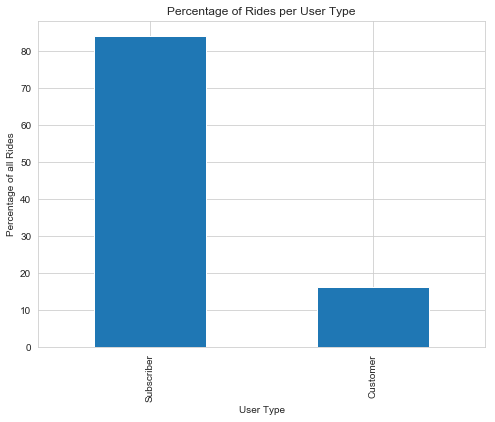

In [4]:
plt.figure(figsize=[8, 6])
(df_gobike.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color)
plt.title("Percentage of Rides per User Type")
plt.ylabel("Percentage of all Rides")
plt.xlabel("User Type");

## Distribution of Gender

74% of all rides have been done by male users.

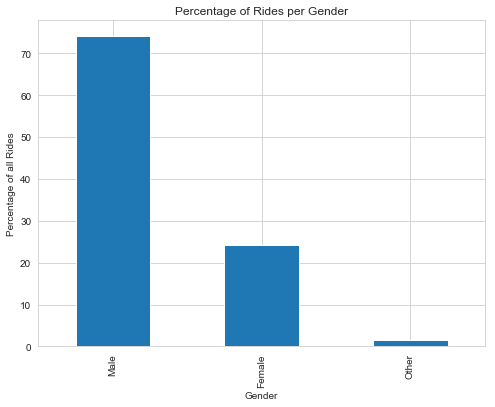

In [5]:
plt.figure(figsize=[8, 6])
(df_gobike.member_gender.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color);
plt.title("Percentage of Rides per Gender")
plt.ylabel("Percentage of all Rides")
plt.xlabel("Gender");

## Distribution of Age

The majority of rides have been done by user between 30 and 40 years. In addition, this variable contains unrealistic outliers, which will be covered later on.

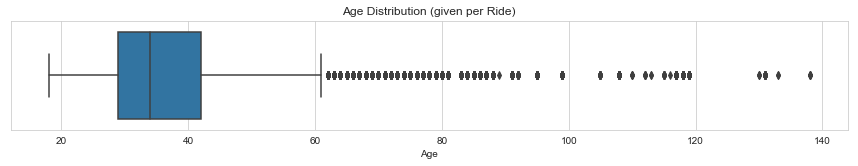

In [6]:
df_gobike['member_age'] = 2019 - df_gobike.member_birth_year
plt.figure(figsize=(15,2))
sb.boxplot(x='member_age', data = df_gobike, color = default_color);
plt.title("Age Distribution (per Ride)")
plt.xlabel("Age");

The next step is to look at the combinations of segments: age and gender.

Note: The following part is limited to the group of subscribers only.

## Distribution of Rides per Age Group and Gender

This graph shows how the amount of rides is distributed across the age groups. By far, most rides have been done by male users between 25 and 34 years.

Note to outlier handling: Rides of users with ages above 100 years have been excluded.

In [18]:
#Separating entries with invalid ages, to set those to 0
df_gobike_outliers_age_100 = df_gobike[(df_gobike.member_age > 100)]
df_go_bike_temp = df_gobike[(df_gobike.member_age <= 100)]

# Setting columns member_birth_year and member_age to 0 for those with invalid ages.
df_gobike_outliers_age_100.member_birth_year = 0
df_gobike_outliers_age_100.member_age = 0

# Appending the dataframes, into a new dataframe, with the corrected values for age and birth year.
df_go_bike_temp = df_go_bike_temp.append(df_gobike_outliers_age_100, sort=False, ignore_index=True)

# Now appending the rows without provided birth year to the dataset in order to restore the orignal amount of entries. 
df_go_bike_temp_birth_nan = df_gobike[(df_gobike.member_birth_year.isna())]
df_go_bike_temp_birth_nan.member_birth_year = 0
df_go_bike_temp_birth_nan.member_age = 0

df_go_bike_temp = df_go_bike_temp.append(df_go_bike_temp_birth_nan, sort=False, ignore_index=True)

# The types for member_birth_year and member_age need to be converted back to type integer.
df_go_bike_temp.member_birth_year = df_go_bike_temp.member_birth_year.astype(int)
df_go_bike_temp.member_age = df_go_bike_temp.member_age.astype(int)

# Copying the corrected data frame to a new version for further analysis
df_gobike_v2 = df_go_bike_temp.copy()

df_gobike_v2['age_group'] = pd.cut(df_gobike_v2.member_age, [0,24,34,44,54,64,74,84,94,100], labels =['15-24', '25-34',
                                                                                        '35-44', '45-54',
                                                                                       '55-64', '65-74',
                                                                                        '75-84', '85-94',
                                                                                        '95-100'                      
                                                                                       ])

df_gobike_v2_male = df_gobike_v2[(df_gobike_v2.member_gender == "Male")]
df_gobike_v2_female = df_gobike_v2[(df_gobike_v2.member_gender == "Female")]

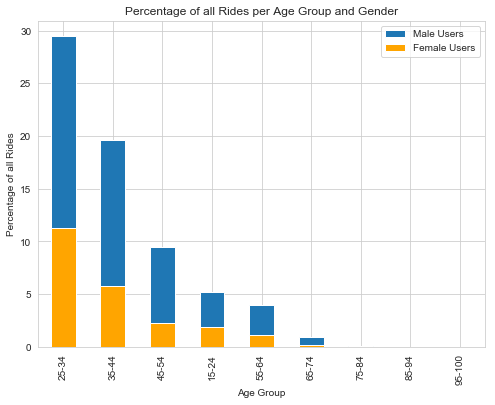

In [15]:
plt.figure(figsize=[8, 6]) 
(df_gobike_v2_male.age_group.value_counts() / len(df_gobike_v2)*100).plot.bar(color = default_color, label='Male Users');
(df_gobike_v2_female.age_group.value_counts() / len(df_gobike_v2)*100).plot.bar(color = 'orange', label='Female Users');
plt.legend(loc='upper right')
plt.title("Percentage of all Rides per Age Group and Gender")
plt.ylabel('Percentage of all Rides')
plt.xlabel('Age Group');

## Distribution of Rides and Age per Gender

Now, we are going to look at the exact distribution of age without grouping for more detailed insight in this variable. In addition to the previous graph, we gain the following additional insights.
<ol>
    <li>Within the group of rides done by male users, the distribution of age is a bit more stretched towards higher ages.</li>
    <li>The group of female users is more dense for rides of users aging around 30 years.</li>
    </ol>

The group of female users leaves space for enormous business growth, especially in under-represented age groups.

Note: rides without values for the variable birth year have been excluded. 

In [9]:
# Separate rides without a given year of birth / age + consideration of the gender male and female only.
df_gobike_without_age_nan = df_gobike_v2[(df_gobike_v2.member_age.notnull()) &
                                          ((df_gobike_v2.member_gender == "Male") |
                                           (df_gobike_v2.member_gender == "Female")
                                          )]

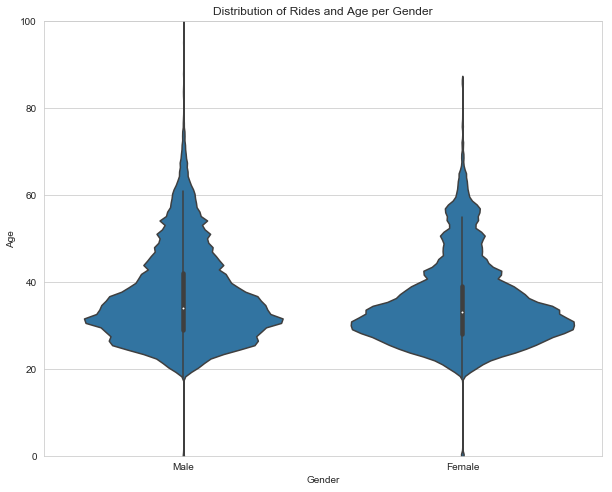

In [10]:
plt.figure(figsize=[10, 8])
sb.violinplot(data = df_gobike_without_age_nan, x = 'member_gender', y = 'member_age', color = default_color)
plt.title("Distribution of Rides and Age per Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.ylim([0,100]);

Before finally combining the metrics "amount of rides" and "duration" with the segments of age and gender, we are going to look at the exact distribution of the ride duration.

Note: The exploration is continued with rides of the user type "subscribers" only.

## Distribution of Ride Duration

The following plot shows, that the majority of rides is shorter than 28 minutes for the group of subscribers. The subscription model includes unlimited rides of up to 45 minutes free of charge.

The graph also shows outlying values, which will be removed for further visualizations.

In [11]:
# Separating the dataset to subscribers only
df_gobike_subscriber = df_gobike_v2[(df_gobike_v2.user_type == "Subscriber")]

# Converting seconds to minutes in an additional column, to make plots more readable.
df_gobike_subscriber['duration_min'] = df_gobike_subscriber.duration_sec/60

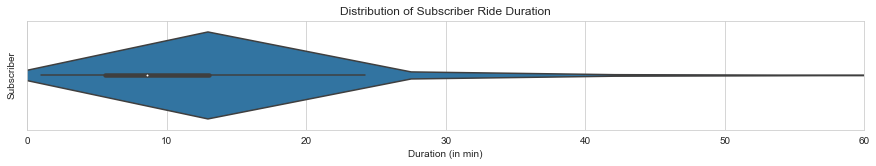

In [12]:
plt.figure(figsize=(15,2))
sb.violinplot(x='duration_min', data = df_gobike_subscriber, color = default_color, label ="Subscriber")   
plt.title("Distribution of Subscriber Ride Duration")
plt.xlabel("Duration (in min)")
plt.ylabel("Subscriber")
plt.xlim(0,60);

An additional quartile analysis revealed that 99.9% of the rides took less than 4 hours. Therefore, rides which took longer are removed from now on. This handling ensures, that only an absolute minimum of data points is excluded, whereas this plot on its own, would have suggested to remove more outlying values. 

Note: To me, 4 hours still seem to be a reasonable trip duration, which might occur from time to time. From a business logic, it makes sense to include those in the analysis, because the happen to be the truth. In addition, the plot shows that only very few trips endure more than 40 minutes. Trips longer than 4 hours may be reasoned by technical issues. The bike might not have been locked properly. 

In the last step, we are to combine all prior dimensions and metrics in a multivariate visualization. This shall generate insights about how each segment / group of users is using the service. That way potential fields for growth can identified.

## Amount and Duration of Rides per Age Group and Gender

The heatmaps show, the group of male users between 25 and 34 years uses the service most in terms of absolute amount of rides. This group also shows the highest total ride duration. Looking the other way around, it visualizes that the group of users between 45-54 has very high potential for growth. These users still have sufficient physical abilities to use FordGoBike. More important however is, that the whole group of woman across all ages represent enormous (unused) business opportunities.

In [13]:
# Excluding outlying rides, which took more than 4 hours (14.400 seconds) from the segment of sucribers. 
df_gobike_subscriber_without_outliers = df_gobike_subscriber[(df_gobike_subscriber.duration_sec <= 14400)]

# Removing "Other" values from the column member_gender. This group of users is too insignificant compared to the 
# groups of male or female users. So excluding the group of "Other" will enhance readibility in the visualization.
df_gobike_subscriber_female_male_without_outliers = df_gobike_subscriber_without_outliers[
    (df_gobike_subscriber_without_outliers.member_gender != "Other")]

# In order to visualize amount of rides and duration segmented by age group and gender, I need to pivot these settings first.
ct_rides_subsriber = df_gobike_subscriber_female_male_without_outliers.groupby(['member_gender', 'age_group']).size()
ct_rides_subsriber = ct_rides_subsriber.reset_index(name = 'count')
ct_rides_subsriber = ct_rides_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'count')

ct_duration_subsriber = df_gobike_subscriber_female_male_without_outliers.groupby(['member_gender', 'age_group'])['duration_sec'].agg('sum')
ct_duration_subsriber = ct_duration_subsriber
ct_duration_subsriber = ct_duration_subsriber.reset_index(name = 'duration_min')
ct_duration_subsriber = ct_duration_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'duration_min')

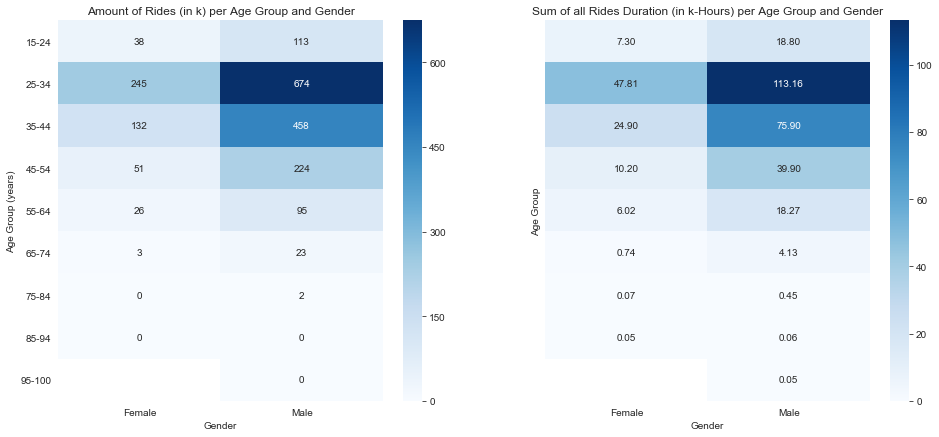

In [16]:
plt.figure(figsize = [16, 7])
plt.subplot(1, 2, 1)
sb.heatmap(ct_rides_subsriber/1000, annot = True, fmt =  '.0f',  cmap = 'Blues')
plt.title("Amount of Rides (in k) per Age Group and Gender")
plt.ylabel("Age Group (years)")
plt.xlabel("Gender")
plt.yticks(rotation=360)
plt.subplot(1, 2, 2)
sb.heatmap(ct_duration_subsriber/60/60/1000, annot = True, fmt =  '.2f',  cmap = 'Blues', yticklabels=False)
plt.title("Sum of all Rides Duration (in k-Hours) per Age Group and Gender")
plt.ylabel("Age Group")
plt.xlabel("Gender");

## Outlook

Now, that is theoretically explored in which segments FordGoBike could experience further growth, to put the opportunities into the real worlds setting.

First, FordGoBike could check with community data, how the population in the area of San Francisco is distributed. Are the enormous potentials in the segment of female users really existent? How is the population divided between males and females? Matches the age group distribution the theoretical potential? Since bike sharing is an option for daily commuters to get to work, are there as much employees and commuters among female citizens as male citizens? Do as much females work within the city center or tend they to work rather outside, compared to male users? Are the reasons and motivations to use a bike identic for man and woman? Do these motives differentiate across the age groups? Could it be, that people between 45 and 54 years own more cars per capita than users between 25 and 34 years? And how differs the bike possession rate among the segments of gender and age group? 

These and other questions shall be asked when reflecting the theoretical value of the exploration against real business environment. The next step could be to derive hypothesis’s and testing those using additional data from San Francisco’s population.